knn_imputer class link: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

knn_imputer blog link: https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/

nan_euclidean distance: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html

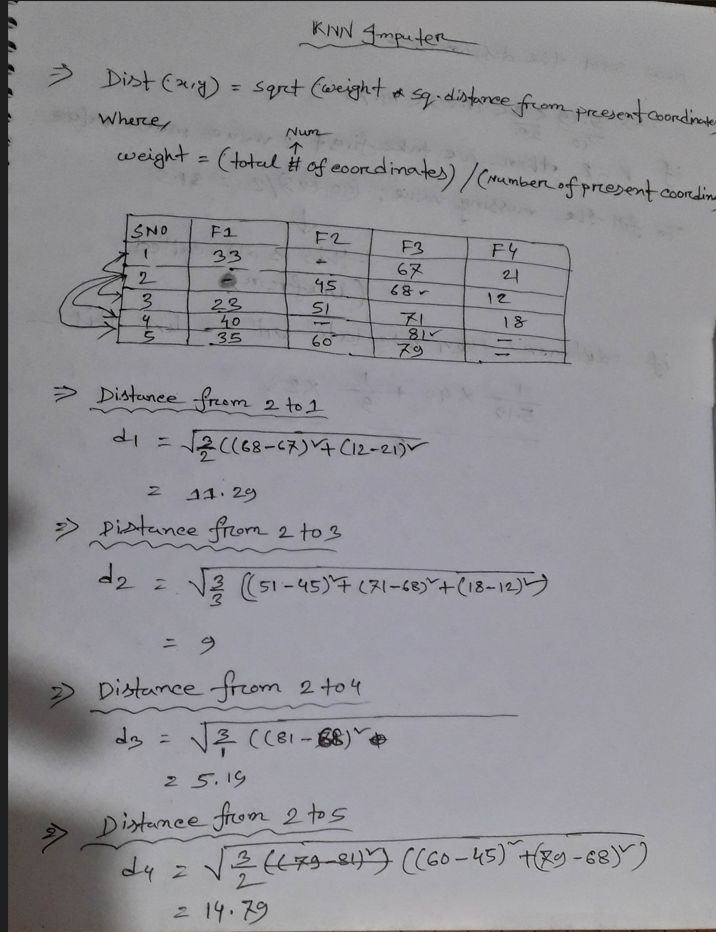

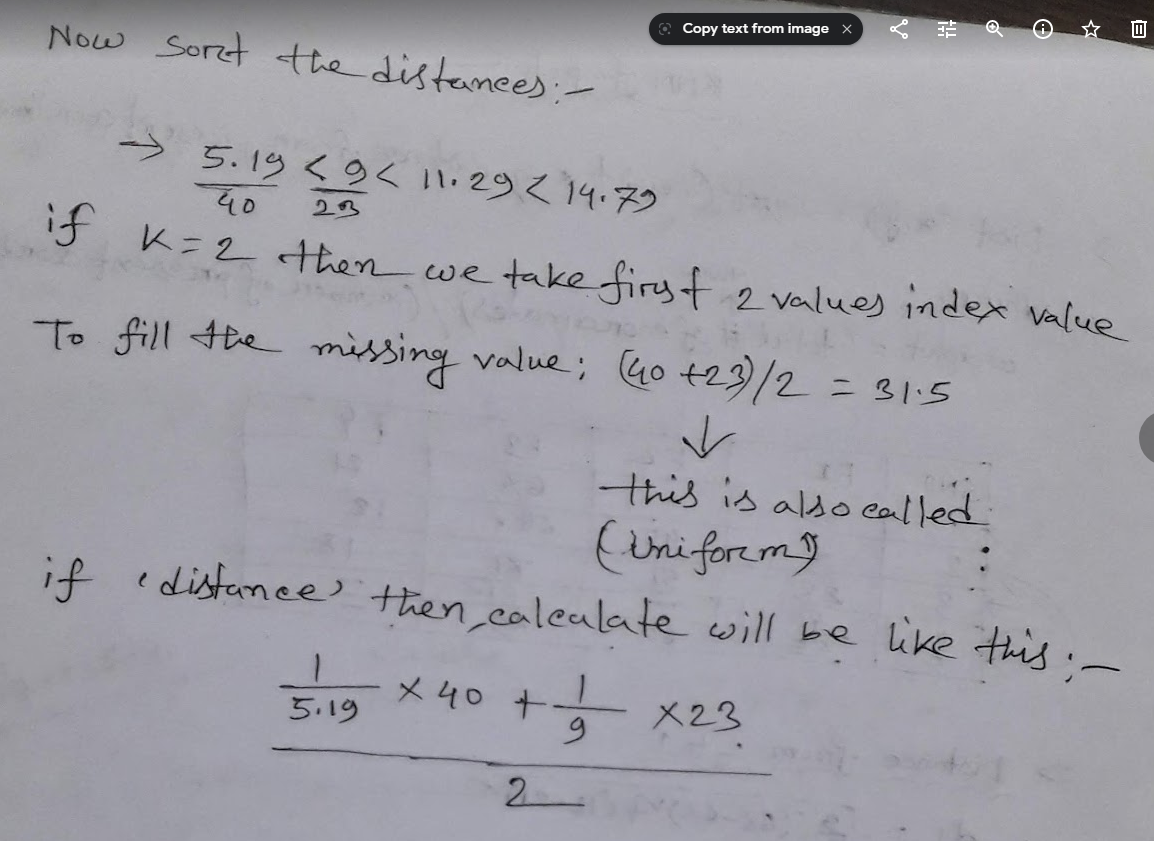

Disadvantage:
    
    1) Need more time if dataset is large
    
    2) When model deploy on server it need to deploy the train data
    
    3) Need parameters tuning

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Dataset/train.csv")[['Age','Pclass','Fare','Survived']]

In [3]:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [4]:
df.shape

(891, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isna().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X.head()

,Age,Pclass,Fare
0,22.0,3,7.2500
1,38.0,1,71.2833
2,26.0,3,7.9250
3,35.0,1,53.1000
4,35.0,3,8.0500


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [11]:
X_train.head()

,Age,Pclass,Fare
793,NaN,1,30.6958
23,28.0,1,35.5000
97,23.0,1,63.3583
9,14.0,2,30.0708
157,30.0,3,8.0500


In [12]:
knn = KNNImputer(n_neighbors=3, weights='distance')

In [13]:
X_train_trf = knn.fit_transform(X=X_train)

X_test_trf = knn.transform(X=X_test)

In [14]:
X_train_trf

array([[56.    ,  1.    , 30.6958],
       [28.    ,  1.    , 35.5   ],
       [23.    ,  1.    , 63.3583],
       ...,
       [57.    ,  2.    , 10.5   ],
       [ 2.    ,  3.    , 39.6875],
       [26.    ,  3.    , 18.7875]])

In [15]:
X_test_trf

array([[2.60000000e+01, 3.00000000e+00, 1.61000000e+01],
       [1.90000000e+01, 3.00000000e+00, 7.77500000e+00],
       [2.00000000e+01, 3.00000000e+00, 8.66250000e+00],
       [3.20000000e+01, 3.00000000e+00, 5.64958000e+01],
       [3.60000000e+01, 2.00000000e+00, 2.77500000e+01],
       [9.00000000e+00, 3.00000000e+00, 3.43750000e+01],
       [4.90000000e+01, 1.00000000e+00, 1.10883300e+02],
       [4.60000000e+01, 2.00000000e+00, 2.60000000e+01],
       [4.05000000e+01, 3.00000000e+00, 7.75000000e+00],
       [1.80000000e+01, 1.00000000e+00, 1.08900000e+02],
       [4.19810178e+01, 3.00000000e+00, 6.95500000e+01],
       [2.90000000e+01, 3.00000000e+00, 1.52458000e+01],
       [1.70000000e+01, 3.00000000e+00, 7.12500000e+00],
       [5.90000000e+01, 2.00000000e+00, 1.35000000e+01],
       [3.40000000e+01, 2.00000000e+00, 2.10000000e+01],
       [2.00000000e+01, 3.00000000e+00, 7.05000000e+00],
       [5.00000000e+01, 2.00000000e+00, 1.30000000e+01],
       [2.00000000e+00, 3.00000

In [16]:
lr = LogisticRegression()

lr.fit(X=X_train_trf, y=y_train)

y_pred = lr.predict(X=X_test_trf)

accuracy_score(y_true=y_test, y_pred=y_pred)

0.7206703910614525

In [17]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X=X_train)

X_test_trf2 = si.transform(X=X_test)

In [18]:
lr2 = LogisticRegression()

lr2.fit(X=X_train_trf2, y=y_train)

y_pred2 = lr.predict(X=X_test_trf2)

accuracy_score(y_true=y_test, y_pred=y_pred2)

0.7206703910614525